# **Контест 1**

Выполнила: Серякова Александра М8O-309Б-22





1.   Импортируем необходимые библиотеки для анализа данных, предобработки и создания модели




In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# Этап 1: Загрузка данных и первичная обработка



*   Загружаем тренировочный набор данных для обучения модели
*   Загружаем тестовый набор данных для предсказания финальных значений








In [49]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')



*   Удаление дубликатов и строк с пропусками в данных для обеспечения чистоты данных

*   Учитываем только числовые столбцы, чтобы избежать обработки категориальных данных





In [50]:
df_train = df_train.dropna().drop_duplicates().select_dtypes(include=[np.number])
df_test = df_test.dropna().drop_duplicates().select_dtypes(include=[np.number])

# Этап 2: Обработка пропусков в данных


*   Создание матрицы корреляции для числовых признаков с целью выявления зависимости между признаками




In [51]:
correlation_matrix = df_train.corr()

Выводим корреляцию каждого признака с целевой переменной 'RiskScore' в виде отсортированного списка

In [55]:
print("Корреляция признаков с целевой переменной 'RiskScore':")
print(correlation_matrix['RiskScore'].sort_values(ascending=False))

Корреляция признаков с целевой переменной 'RiskScore':
RiskScore                     1.000000
PaymentHistory                0.014500
NumberOfCreditInquiries       0.013553
SavingsAccountBalance         0.013527
LoanAmount                    0.012652
TotalDebtToIncomeRatio        0.012474
MonthlyLoanPayment            0.011907
NetWorth                      0.009547
TotalAssets                   0.008887
JobTenure                     0.006056
BankruptcyHistory             0.005654
InterestRate                  0.005356
CreditCardUtilizationRate     0.004804
LoanDuration                  0.004275
BaseInterestRate              0.003101
CreditScore                   0.001598
NumberOfOpenCreditLines      -0.000776
CheckingAccountBalance       -0.000789
MonthlyDebtPayments          -0.001057
Age                          -0.001519
Experience                   -0.002490
TotalLiabilities             -0.003688
PreviousLoanDefaults         -0.004580
MonthlyIncome                -0.004871
LengthOfC

Или визуализируем полную корреляционную матрицу с уникальными настройками

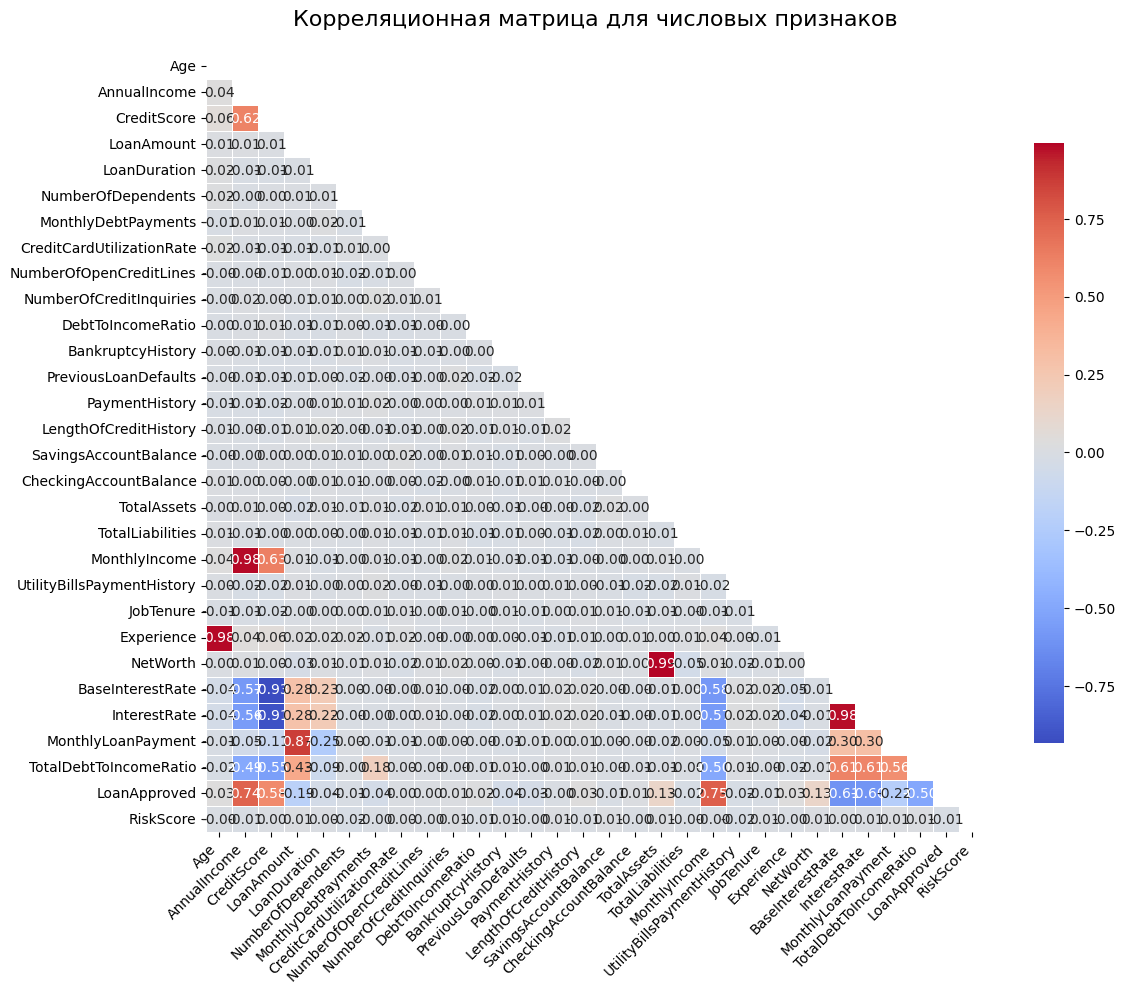

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f",
            linewidths=0.5, cbar_kws={"shrink": 0.75}, square=True)

# Настраиваем заголовок и метки для более качественного отображения
plt.title('Корреляционная матрица для числовых признаков', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



*   Визуализация корреляционной матрицы, чтобы оценить зависимость признаков от целевой переменной RiskScore



<Axes: >

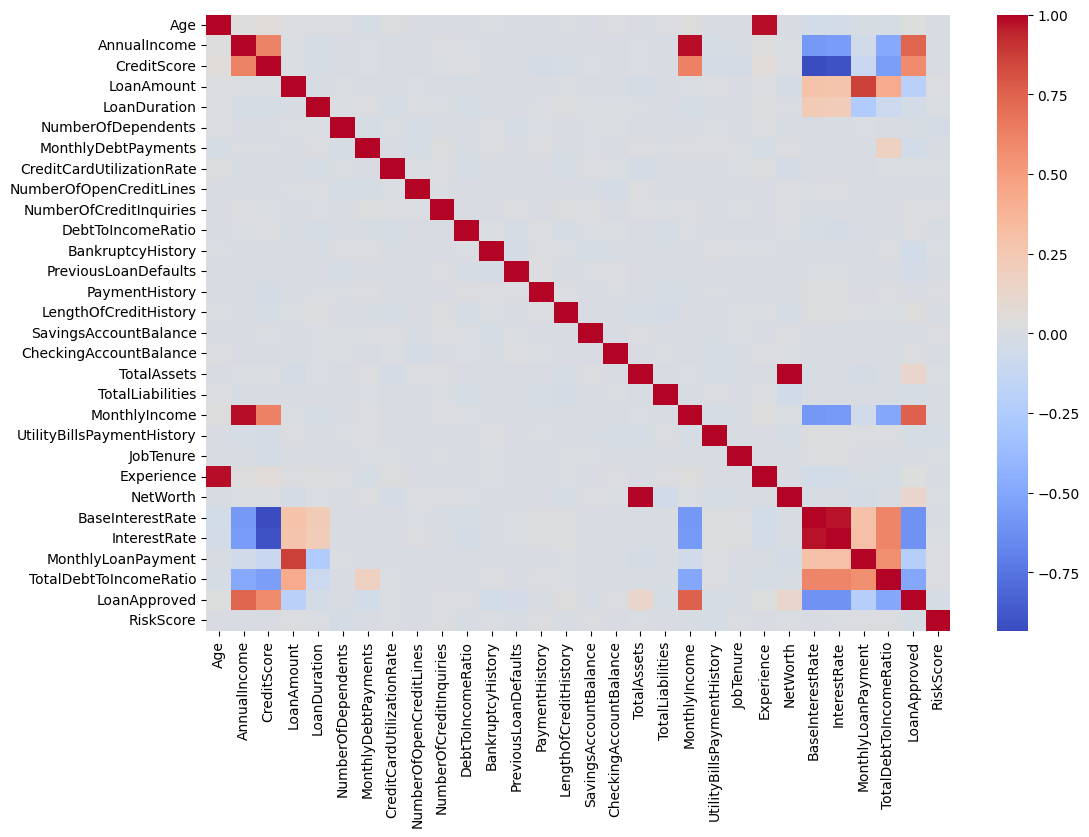

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True)

# Этап 3: Анализ распределения целевой переменной и удаление выбросов

*   Анализ статистических характеристик целевой переменной 'RiskScore' до удаления выбросов



In [57]:
print("\nСтатистические характеристики переменной 'RiskScore' до удаления выбросов:")
print(df_train['RiskScore'].describe())


Статистические характеристики переменной 'RiskScore' до удаления выбросов:
count    9.529000e+03
mean    -3.458380e+04
std      1.437496e+06
min     -9.999999e+06
25%      3.249476e+01
50%      4.401980e+01
75%      6.526522e+01
max      1.000000e+07
Name: RiskScore, dtype: float64




*   Визуализация распределения 'RiskScore' с использованием KDE (ядерной оценки плотности)



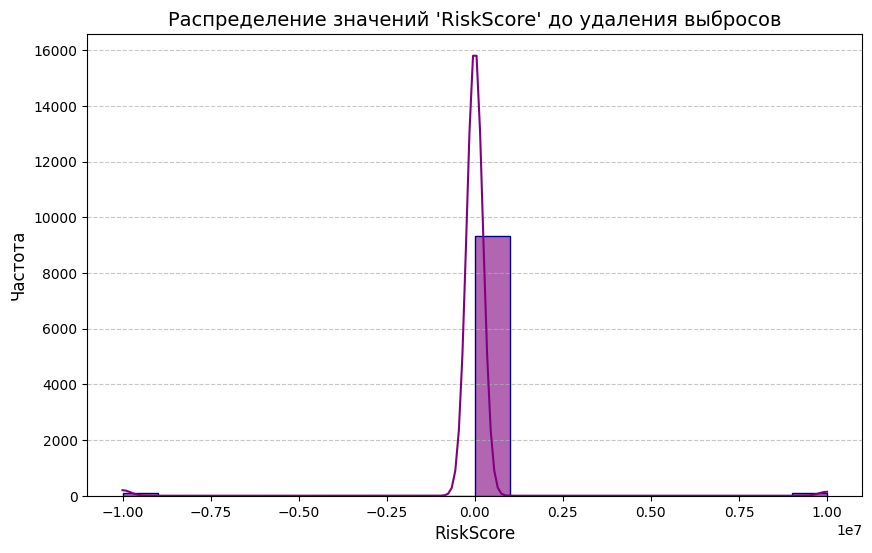

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
sns.histplot(df_train['RiskScore'], bins=20, kde=True, color='purple', edgecolor='darkblue', alpha=0.6)
plt.title("Распределение значений 'RiskScore' до удаления выбросов", fontsize=14)
plt.xlabel('RiskScore', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Изменяем стиль сетки
plt.show()



*   Удаление выбросов: значения ниже 0 и выше 100 считаются выбросами и удаляются из данных



In [59]:
df_train = df_train[(df_train['RiskScore'] >= 0) & (df_train['RiskScore'] <= 100)]

Повторная визуализация распределения 'RiskScore' после удаления выбросов

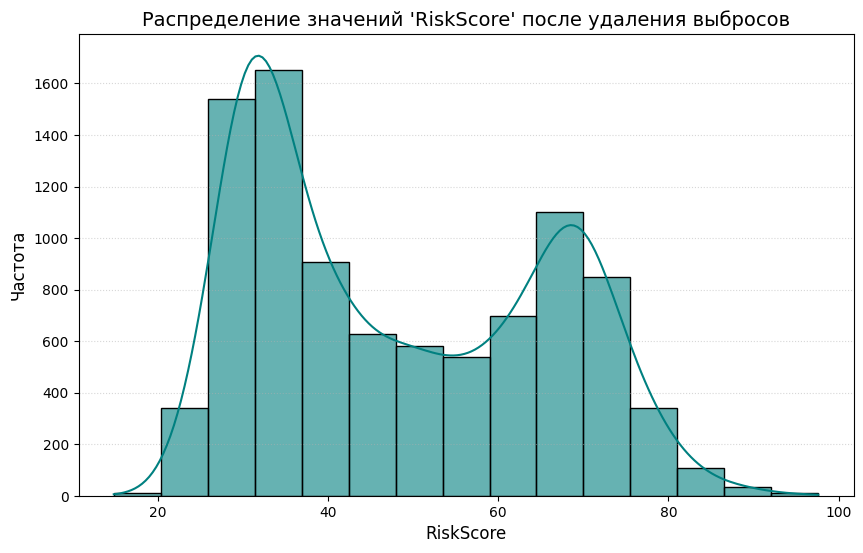

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['RiskScore'], bins=15, kde=True, color='teal', edgecolor='black', alpha=0.6)
plt.title("Распределение значений 'RiskScore' после удаления выбросов", fontsize=14)
plt.xlabel('RiskScore', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(axis='y', linestyle=':', alpha=0.5)  # Облегчённый стиль сетки
plt.show()

In [61]:
print("\nСтатистические характеристики 'RiskScore' после удаления выбросов:")
print(df_train['RiskScore'].describe())


Статистические характеристики 'RiskScore' после удаления выбросов:
count    9332.000000
mean       48.312511
std        17.243078
min        14.841417
25%        32.693275
50%        44.127496
75%        65.059406
max        97.597249
Name: RiskScore, dtype: float64


# Этап 4: Подготовка данных для обучения модели

*   Выделение признаков (X) и целевой переменной (y) из обучающего набора данных



In [62]:
X = df_train.loc[:, df_train.columns != 'RiskScore']
y = df_train['RiskScore']



*   Разделение данных на обучающую и тестовую выборки для проверки точности модели



In [63]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Этап 5: Обучение модели линейной регрессии и оценка на тестовой выборке


*   Инициализация модели линейной регрессии для прогнозирования RiskScore



In [64]:
model = LinearRegression()

Обучение модели на тренировочной выборке

In [65]:
model.fit(X_train, y_train)

LinearRegression()



Применение модели для предсказания на тестовой выборке



In [66]:
y_pred = model.predict(X_val)

Оценка точности модели с помощью MSE и R²

In [67]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

Выводим значения метрик для оценки качества модели

In [68]:
print(f"Mean Squared Error (MSE) на тестовых данных: {mse}")
print(f"Коэффициент детерминации R² на тестовых данных: {r2}")

Mean Squared Error (MSE) на тестовых данных: 20.475549417312635
Коэффициент детерминации R² на тестовых данных: 0.9316217941887361


# Этап 6: Оценка модели с использованием кросс-валидации

Настройка метрики MSE для кросс-валидации

In [69]:
mse_scorer = make_scorer(mean_squared_error)

Проведение кросс-валидации на 5 фолдах для оценки устойчивости модели

In [70]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)

Выводим MSE по каждому фолду кросс-валидации и среднее значение

In [71]:
print("MSE для каждого фолда (кросс-валидация):", cv_scores)
print(f"Средний MSE по результатам кросс-валидации: {cv_scores.mean()}")

MSE для каждого фолда (кросс-валидация): [20.23107649 19.38746412 19.94743637 20.33657991 20.61206998]
Средний MSE по результатам кросс-валидации: 20.10292537456853


# Этап 7: Прогнозирование для тестового набора и формирование файла для отправки

Подготовка тестового набора: удаляем столбец 'ID' перед применением модели

In [72]:
X_test = df_test.drop(columns=['ID'])

Прогнозирование для тестового набора данных

In [73]:
y_test_pred = model.predict(X_test)

Формирование DataFrame с ID и предсказанными значениями для RiskScore

In [74]:
df_result = pd.DataFrame({
    'ID': df_test['ID'],
    'RiskScore': y_test_pred
})

Сохранение результатов в CSV файл для отправки

In [75]:
df_result.to_csv('contest.csv', index=False)